In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from cevaetools import *
from CEVAE import *
%load_ext autoreload
%autoreload 2

In [3]:
"""Let's define the model here"""
c_x = np.array([1,2])
s_x = np.array([0.5,0.7])
c_t = np.array([0.5])
s_t = np.array([1])
c_yz = np.array([0.6])
c_yt = np.array([1])
s_y = np.array([1])

# Baseline no scaling

In [80]:
from lineartoydata import linear_data_df
num_samples = 30000
BATCH_SIZE = 500
df = linear_data_df(num_samples, c_x, c_t, c_yz, c_yt, s_x, s_t, s_y)
dataset = CEVAEDataset(df)
dataloader = DataLoader(dataset, batch_size=BATCH_SIZE)

In [81]:
device='cpu'
plot_curves=False
print_logs=True
num_epochs=100
lr_start=0.01
lr_end=0.0005
x_dim=2
z_dim=10

Epoch 0:
Epoch loss: 212990.55224609375
x: 113071.28173828125, t: 45957.370544433594, y: 51761.128967285156, kld: 2200.7708407640457
Epoch 1:
Epoch loss: 203659.49780273438
x: 111231.32727050781, t: 45863.564453125, y: 46513.22302246094, kld: 51.38354444503784
Epoch 2:
Epoch loss: 203507.2578125
x: 111218.54382324219, t: 45861.914123535156, y: 46395.469970703125, kld: 31.328566312789917
Epoch 3:
Epoch loss: 203444.451171875
x: 111167.55419921875, t: 45861.69372558594, y: 46317.96740722656, kld: 97.23430687189102
Epoch 4:
Epoch loss: 197890.51098632812
x: 98446.6826171875, t: 44388.55291748047, y: 44288.32958984375, kld: 10766.946246147156
Epoch 5:
Epoch loss: 182129.14013671875
x: 64365.55407714844, t: 42603.080505371094, y: 42476.35070800781, kld: 32684.155242919922
Epoch 6:
Epoch loss: 180363.53515625
x: 59767.78210449219, t: 42518.63024902344, y: 42484.25390625, kld: 35592.869079589844
Epoch 7:
Epoch loss: 179520.93017578125
x: 58148.07019042969, t: 42491.799560546875, y: 42471.3483

Epoch loss: 178133.06396484375
x: 54686.62371826172, t: 42368.59582519531, y: 42268.82403564453, kld: 38809.020568847656
Epoch 64:
Epoch loss: 177939.00122070312
x: 54715.811462402344, t: 42377.45489501953, y: 42247.50537109375, kld: 38598.23077392578
Epoch 65:
Epoch loss: 177870.62841796875
x: 54564.076904296875, t: 42369.368896484375, y: 42286.113342285156, kld: 38651.06951904297
Epoch 66:
Epoch loss: 178038.45727539062
x: 54602.73742675781, t: 42349.50817871094, y: 42269.732666015625, kld: 38816.47985839844
Epoch 67:
Epoch loss: 177942.28979492188
x: 54673.14953613281, t: 42365.357666015625, y: 42273.774841308594, kld: 38630.00793457031
Epoch 68:
Epoch loss: 177916.42236328125
x: 54485.58807373047, t: 42365.7001953125, y: 42252.482360839844, kld: 38812.65222167969
Epoch 69:
Epoch loss: 177865.07373046875
x: 54536.956481933594, t: 42352.67156982422, y: 42286.52001953125, kld: 38688.926330566406
Epoch 70:
Epoch loss: 177957.12963867188
x: 54527.12908935547, t: 42368.3779296875, y: 422

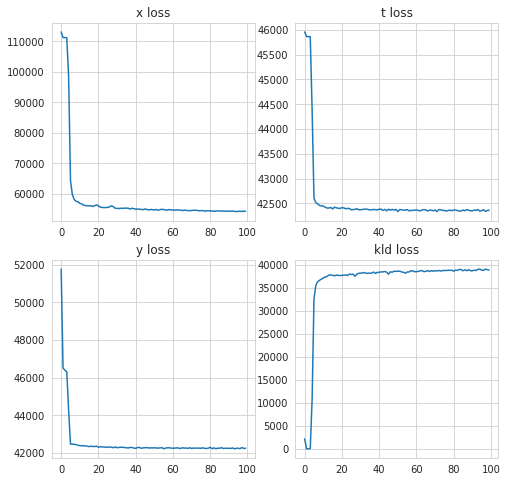

In [82]:
model, losses = train_model(device, plot_curves, print_logs,
              dataloader, num_epochs, lr_start, lr_end, x_dim, z_dim,
              p_y_zt_nn_layers=3, p_y_zt_nn_width=10, 
              p_t_z_nn_layers=3, p_t_z_nn_width=10,
              p_x_z_nn_layers=3, p_x_z_nn_width=10,
              q_z_nn_layers=3, q_z_nn_width=10,
              t_mode=0, y_mode=0, x_mode=[0,0], ty_separate_enc=False, x_loss_scaling=1)

In [83]:
AID, py_dot_model, py_dot_true, y_range, t_range, pt_true = estimate_AID_lineardata(model, c_yt, c_yz, s_y, c_t, s_t, c_x, n=100, lim=6, nsample=10000)

AID:  0.01688573278667506


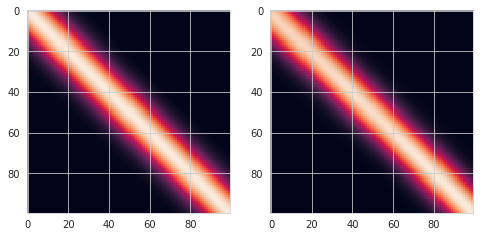

In [84]:
print("AID: ", AID)
fig, ax = plt.subplots(1,2,figsize=(8,4))
ax[0].imshow(py_dot_true)
ax[1].imshow(py_dot_model)
plt.show()

# With scaling
- Note: Looks like the optimization develops really slowly, maybe it could still work but the scaling changes the optimization landscape so that it's very flat or something
- Or: Did it get it right in the beginning?

In [86]:
device='cpu'
plot_curves=False
print_logs=True
num_epochs= 1000
lr_start=0.001
lr_end=0.0001
x_dim=2
z_dim=10

Epoch 0:
Epoch loss: 138402.1573486328
x: 13593.40478515625, t: 46298.034606933594, y: 69743.66381835938, kld: 8767.05347442627
Epoch 1:
Epoch loss: 118196.01245117188
x: 11374.203643798828, t: 45848.16662597656, y: 59934.951721191406, kld: 1038.6902096271515
Epoch 2:
Epoch loss: 114605.21301269531
x: 11137.870346069336, t: 45853.497009277344, y: 57443.058044433594, kld: 170.78752946853638
Epoch 3:
Epoch loss: 111175.58898925781
x: 11130.203567504883, t: 45857.00524902344, y: 54063.138916015625, kld: 125.2409679889679
Epoch 4:
Epoch loss: 107313.92419433594
x: 11128.89729309082, t: 45852.32116699219, y: 50225.364318847656, kld: 107.34231054782867
Epoch 5:
Epoch loss: 105213.99780273438
x: 11125.186889648438, t: 45844.763732910156, y: 48157.308837890625, kld: 86.73802196979523
Epoch 6:
Epoch loss: 104481.32543945312
x: 11125.155471801758, t: 45839.23291015625, y: 47444.059631347656, kld: 72.87759327888489
Epoch 7:
Epoch loss: 104256.82995605469
x: 11124.180603027344, t: 45836.4792480468

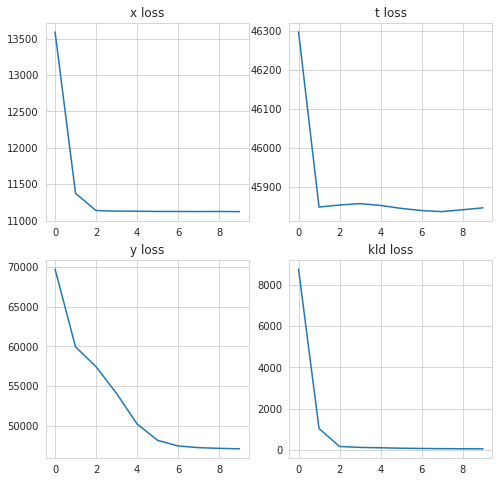

In [87]:
model, losses = train_model(device, plot_curves, print_logs,
              dataloader, num_epochs, lr_start, lr_end, x_dim, z_dim,
              p_y_zt_nn_layers=3, p_y_zt_nn_width=10, 
              p_t_z_nn_layers=3, p_t_z_nn_width=10,
              p_x_z_nn_layers=3, p_x_z_nn_width=10,
              q_z_nn_layers=3, q_z_nn_width=10,
              t_mode=0, y_mode=0, x_mode=[0,0], ty_separate_enc=False, x_loss_scaling=0.1)

In [88]:
AID, py_dot_model, py_dot_true, y_range, t_range, pt_true = estimate_AID_lineardata(model, c_yt, c_yz, s_y, c_t, s_t, c_x, n=100, lim=6, nsample=10000)

AID:  0.17766980108569155


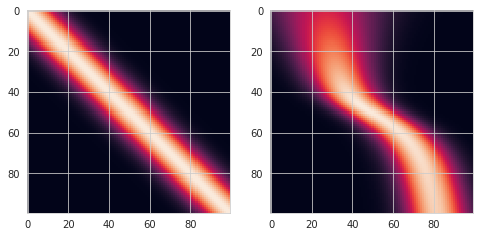

In [89]:
print("AID: ", AID)
fig, ax = plt.subplots(1,2,figsize=(8,4))
ax[0].imshow(py_dot_true)
ax[1].imshow(py_dot_model)
plt.show()

# With moderate scaling

In [55]:
device='cpu'
plot_curves=False
print_logs=True
num_epochs=400
lr_start=0.001
lr_end=0.0001
x_dim=2
z_dim=10

Epoch 0:
Epoch loss: 251232.17358398438
x: 107338.29370117188, t: 51201.82507324219, y: 79879.23693847656, kld: 12812.815856933594
Epoch 1:
Epoch loss: 208956.904296875
x: 100196.13842773438, t: 46276.85888671875, y: 60093.877502441406, kld: 2390.029800415039
Epoch 2:
Epoch loss: 200741.5087890625
x: 99691.26733398438, t: 45922.44812011719, y: 54249.885314941406, kld: 877.9085493087769
Epoch 3:
Epoch loss: 195638.01098632812
x: 99377.83178710938, t: 45868.269287109375, y: 49401.434326171875, kld: 990.4759845733643
Epoch 4:
Epoch loss: 193638.4794921875
x: 99022.90759277344, t: 45870.56994628906, y: 47559.24090576172, kld: 1185.7620420455933
Epoch 5:
Epoch loss: 193127.69287109375
x: 98496.38830566406, t: 45796.48376464844, y: 47136.452087402344, kld: 1698.3676776885986
Epoch 6:
Epoch loss: 192851.90258789062
x: 98008.52404785156, t: 45770.60021972656, y: 46881.665771484375, kld: 2191.1115283966064
Epoch 7:
Epoch loss: 192522.232421875
x: 97542.15380859375, t: 45738.020446777344, y: 466

Epoch loss: 172888.087890625
x: 53267.447692871094, t: 42505.228942871094, y: 42438.46374511719, kld: 34676.94689941406
Epoch 64:
Epoch loss: 173165.39990234375
x: 53392.91583251953, t: 42504.98016357422, y: 42420.661071777344, kld: 34846.842041015625
Epoch 65:
Epoch loss: 173009.45751953125
x: 53149.98858642578, t: 42501.60607910156, y: 42496.567932128906, kld: 34861.295959472656
Epoch 66:
Epoch loss: 173053.412109375
x: 53242.68518066406, t: 42520.72888183594, y: 42415.93536376953, kld: 34874.06280517578
Epoch 67:
Epoch loss: 173040.59887695312
x: 53238.37188720703, t: 42495.55749511719, y: 42493.03015136719, kld: 34813.63800048828
Epoch 68:
Epoch loss: 173042.67407226562
x: 53172.22393798828, t: 42505.729553222656, y: 42428.647705078125, kld: 34936.07312011719
Epoch 69:
Epoch loss: 173046.32348632812
x: 53363.8466796875, t: 42486.6162109375, y: 42438.924377441406, kld: 34756.93524169922
Epoch 70:
Epoch loss: 172604.98266601562
x: 53071.40643310547, t: 42527.46954345703, y: 42404.797

Epoch loss: 172782.41064453125
x: 53066.609130859375, t: 42519.33728027344, y: 42469.01525878906, kld: 34727.44885253906
Epoch 127:
Epoch loss: 173024.5810546875
x: 53161.857971191406, t: 42492.34167480469, y: 42421.55895996094, kld: 34948.82238769531
Epoch 128:
Epoch loss: 172704.53247070312
x: 53032.57342529297, t: 42514.537536621094, y: 42400.621032714844, kld: 34756.798278808594
Epoch 129:
Epoch loss: 172964.43481445312
x: 53246.910095214844, t: 42502.02069091797, y: 42416.803466796875, kld: 34798.701904296875
Epoch 130:
Epoch loss: 172780.88037109375
x: 53118.27294921875, t: 42492.281311035156, y: 42430.05078125, kld: 34740.27648925781
Epoch 131:
Epoch loss: 172826.5439453125
x: 53158.77746582031, t: 42512.508850097656, y: 42422.900146484375, kld: 34732.35729980469
Epoch 132:
Epoch loss: 172729.05078125
x: 53163.43933105469, t: 42522.03356933594, y: 42436.40222167969, kld: 34607.17498779297
Epoch 133:
Epoch loss: 173092.255859375
x: 53333.08673095703, t: 42513.164001464844, y: 424

Epoch loss: 172829.5810546875
x: 53113.59344482422, t: 42530.401794433594, y: 42373.92395019531, kld: 34811.66125488281
Epoch 190:
Epoch loss: 172896.10473632812
x: 53089.502868652344, t: 42506.425354003906, y: 42476.30871582031, kld: 34823.868408203125
Epoch 191:
Epoch loss: 172907.53979492188
x: 53071.88311767578, t: 42501.294982910156, y: 42421.28094482422, kld: 34913.08074951172
Epoch 192:
Epoch loss: 172794.99926757812
x: 53093.01940917969, t: 42515.172790527344, y: 42426.013610839844, kld: 34760.79376220703
Epoch 193:
Epoch loss: 172763.8271484375
x: 53160.017578125, t: 42478.340881347656, y: 42457.43859863281, kld: 34668.029724121094
Epoch 194:
Epoch loss: 172971.22021484375
x: 53188.710998535156, t: 42510.21142578125, y: 42429.95349121094, kld: 34842.344299316406
Epoch 195:
Epoch loss: 172890.40112304688
x: 53198.582763671875, t: 42480.33850097656, y: 42417.117919921875, kld: 34794.361755371094
Epoch 196:
Epoch loss: 172776.17260742188
x: 53128.2744140625, t: 42504.200622558594

Epoch loss: 172778.89990234375
x: 53006.37060546875, t: 42474.07189941406, y: 42442.408264160156, kld: 34856.04772949219
Epoch 253:
Epoch loss: 172844.01391601562
x: 53002.34851074219, t: 42512.4970703125, y: 42379.835205078125, kld: 34949.33203125
Epoch 254:
Epoch loss: 172687.72729492188
x: 53026.66320800781, t: 42526.58679199219, y: 42396.983947753906, kld: 34737.4921875
Epoch 255:
Epoch loss: 172947.23974609375
x: 53075.05126953125, t: 42473.867126464844, y: 42431.07556152344, kld: 34967.24572753906
Epoch 256:
Epoch loss: 172737.8740234375
x: 52939.728454589844, t: 42532.52490234375, y: 42467.97674560547, kld: 34797.64404296875
Epoch 257:
Epoch loss: 172653.5537109375
x: 53139.57214355469, t: 42476.30938720703, y: 42391.78582763672, kld: 34645.887268066406
Epoch 258:
Epoch loss: 172820.2578125
x: 53157.18371582031, t: 42502.78942871094, y: 42400.10778808594, kld: 34760.17590332031
Epoch 259:
Epoch loss: 172802.068359375
x: 53137.32489013672, t: 42479.54278564453, y: 42455.262390136

Epoch loss: 172785.0205078125
x: 53015.121520996094, t: 42449.234436035156, y: 42413.57098388672, kld: 34907.093994140625
Epoch 316:
Epoch loss: 172838.72680664062
x: 53104.486755371094, t: 42484.719177246094, y: 42464.94366455078, kld: 34784.576904296875
Epoch 317:
Epoch loss: 172621.20336914062
x: 52969.02185058594, t: 42525.997131347656, y: 42401.117126464844, kld: 34725.06671142578
Epoch 318:
Epoch loss: 172649.99682617188
x: 53032.37158203125, t: 42479.37091064453, y: 42466.064697265625, kld: 34672.189025878906
Epoch 319:
Epoch loss: 172915.43701171875
x: 53151.18505859375, t: 42504.071350097656, y: 42415.970703125, kld: 34844.209716796875
Epoch 320:
Epoch loss: 172770.97290039062
x: 52947.980529785156, t: 42510.27600097656, y: 42435.731018066406, kld: 34876.984436035156
Epoch 321:
Epoch loss: 172807.07421875
x: 52999.673828125, t: 42503.37658691406, y: 42375.93518066406, kld: 34928.08874511719
Epoch 322:
Epoch loss: 172644.611328125
x: 52968.95819091797, t: 42505.74822998047, y: 

Epoch loss: 172944.29809570312
x: 53124.36071777344, t: 42511.841735839844, y: 42419.907958984375, kld: 34888.188232421875
Epoch 379:
Epoch loss: 172766.5732421875
x: 52961.28680419922, t: 42478.7197265625, y: 42362.84143066406, kld: 34963.72314453125
Epoch 380:
Epoch loss: 172649.25341796875
x: 53005.01251220703, t: 42487.67639160156, y: 42451.90447998047, kld: 34704.65832519531
Epoch 381:
Epoch loss: 172758.20092773438
x: 52987.18347167969, t: 42512.48645019531, y: 42462.51843261719, kld: 34796.013122558594
Epoch 382:
Epoch loss: 172626.39013671875
x: 52940.879150390625, t: 42496.196044921875, y: 42378.17596435547, kld: 34811.13934326172
Epoch 383:
Epoch loss: 172543.95971679688
x: 53013.418701171875, t: 42474.55773925781, y: 42371.371643066406, kld: 34684.611572265625
Epoch 384:
Epoch loss: 172838.33666992188
x: 53141.454162597656, t: 42525.478759765625, y: 42402.521484375, kld: 34768.88311767578
Epoch 385:
Epoch loss: 172711.5087890625
x: 53041.23211669922, t: 42511.46179199219, y:

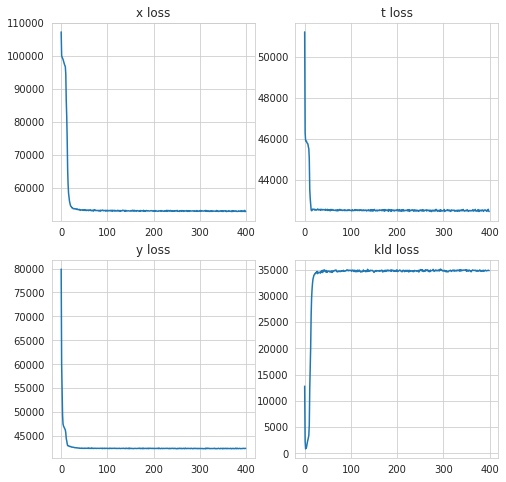

In [56]:
model, losses = train_model(device, plot_curves, print_logs,
              dataloader, num_epochs, lr_start, lr_end, x_dim, z_dim,
              p_y_zt_nn_layers=3, p_y_zt_nn_width=10, 
              p_t_z_nn_layers=3, p_t_z_nn_width=10,
              p_x_z_nn_layers=3, p_x_z_nn_width=10,
              q_z_nn_layers=3, q_z_nn_width=10,
              t_mode=0, y_mode=0, x_mode=[0,0], ty_separate_enc=False, x_loss_scaling=0.9)

In [57]:
AID, py_dot_model, py_dot_true, y_range, t_range, pt_true = estimate_AID_lineardata(model, c_yt, c_yz, s_y, c_t, s_t, c_x, n=100, lim=6, nsample=10000)

AID:  0.015923082162623305


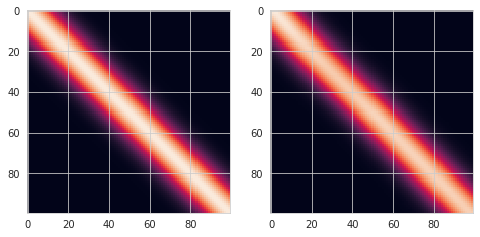

In [58]:
print("AID: ", AID)
fig, ax = plt.subplots(1,2,figsize=(8,4))
ax[0].imshow(py_dot_true)
ax[1].imshow(py_dot_model)
plt.show()

# With scaling = 0.5

In [94]:
device='cpu'
plot_curves=False
print_logs=True
num_epochs= 600
lr_start=0.001
lr_end=0.0001
x_dim=2
z_dim=10

Epoch 0:
Epoch loss: 193347.03515625
x: 77072.98950195312, t: 46014.814392089844, y: 58728.54150390625, kld: 11530.68864440918
Epoch 1:
Epoch loss: 157470.58837890625
x: 58790.10778808594, t: 45827.82434082031, y: 51248.188232421875, kld: 1604.4678468704224
Epoch 2:
Epoch loss: 148769.890625
x: 55696.22137451172, t: 45844.809997558594, y: 46919.73583984375, kld: 309.1233060359955
Epoch 3:
Epoch loss: 148257.86694335938
x: 55580.815185546875, t: 45848.99005126953, y: 46674.54034423828, kld: 153.52144122123718
Epoch 4:
Epoch loss: 148151.30322265625
x: 55594.47985839844, t: 45845.190185546875, y: 46599.45928955078, kld: 112.17403101921082
Epoch 5:
Epoch loss: 148090.28393554688
x: 55591.349548339844, t: 45826.14208984375, y: 46564.90075683594, kld: 107.89318835735321
Epoch 6:
Epoch loss: 148071.1416015625
x: 55579.872619628906, t: 45825.94708251953, y: 46556.61114501953, kld: 108.71012961864471
Epoch 7:
Epoch loss: 147991.7080078125
x: 55576.297790527344, t: 45832.022216796875, y: 46471.

Epoch loss: 142080.37475585938
x: 48671.49725341797, t: 37003.259826660156, y: 27881.920043945312, kld: 28523.696655273438
Epoch 64:
Epoch loss: 141854.08154296875
x: 48687.5419921875, t: 36971.62756347656, y: 27769.331787109375, kld: 28425.579803466797
Epoch 65:
Epoch loss: 142311.09350585938
x: 48720.82293701172, t: 36900.61083984375, y: 28047.11834716797, kld: 28642.54168701172
Epoch 66:
Epoch loss: 142031.22827148438
x: 48673.53088378906, t: 37047.81805419922, y: 27698.80239868164, kld: 28611.076873779297
Epoch 67:
Epoch loss: 141975.13842773438
x: 48695.43127441406, t: 36862.02227783203, y: 27794.498321533203, kld: 28623.18685913086
Epoch 68:
Epoch loss: 141993.68774414062
x: 48701.34735107422, t: 36933.97058105469, y: 27640.319396972656, kld: 28718.05047607422
Epoch 69:
Epoch loss: 142017.38891601562
x: 48704.189025878906, t: 36857.88494873047, y: 27410.24462890625, kld: 29045.071746826172
Epoch 70:
Epoch loss: 141986.89965820312
x: 48703.37384033203, t: 36888.607177734375, y: 27

Epoch loss: 141872.3564453125
x: 48901.51495361328, t: 36277.308654785156, y: 23840.90594482422, kld: 32852.626708984375
Epoch 127:
Epoch loss: 141920.67260742188
x: 48921.65539550781, t: 36347.71105957031, y: 23602.133087158203, kld: 33049.172912597656
Epoch 128:
Epoch loss: 141959.86206054688
x: 48934.84765625, t: 36318.771545410156, y: 23863.487854003906, kld: 32842.75714111328
Epoch 129:
Epoch loss: 142103.8974609375
x: 48921.09112548828, t: 36407.64831542969, y: 23536.474060058594, kld: 33238.68389892578
Epoch 130:
Epoch loss: 141939.75048828125
x: 48931.72247314453, t: 36302.144775390625, y: 23566.333374023438, kld: 33139.54962158203
Epoch 131:
Epoch loss: 141599.21630859375
x: 48946.72430419922, t: 36273.20135498047, y: 23403.35333251953, kld: 32975.935607910156
Epoch 132:
Epoch loss: 142035.20751953125
x: 48963.367919921875, t: 36303.195861816406, y: 23398.27426147461, kld: 33370.369079589844
Epoch 133:
Epoch loss: 141735.47485351562
x: 48933.76043701172, t: 36289.356018066406,

Epoch loss: 142019.19018554688
x: 49036.95947265625, t: 36059.30499267578, y: 21616.616424560547, kld: 35306.308837890625
Epoch 190:
Epoch loss: 141861.19555664062
x: 49007.18389892578, t: 36026.31658935547, y: 21602.441864013672, kld: 35225.251525878906
Epoch 191:
Epoch loss: 141963.15307617188
x: 49029.028076171875, t: 36090.984802246094, y: 21550.509338378906, kld: 35292.631896972656
Epoch 192:
Epoch loss: 141744.93139648438
x: 49035.097717285156, t: 36048.262634277344, y: 21510.187072753906, kld: 35151.384338378906
Epoch 193:
Epoch loss: 141759.56103515625
x: 49047.125061035156, t: 36110.80303955078, y: 21359.328399658203, kld: 35242.30529785156
Epoch 194:
Epoch loss: 141834.78955078125
x: 49043.18182373047, t: 36073.48449707031, y: 21428.311065673828, kld: 35289.812072753906
Epoch 195:
Epoch loss: 141674.31420898438
x: 49042.747802734375, t: 36024.82189941406, y: 21451.679138183594, kld: 35155.0654296875
Epoch 196:
Epoch loss: 141682.0419921875
x: 49053.107177734375, t: 36111.6854

Epoch loss: 141894.9248046875
x: 49113.94592285156, t: 35851.18469238281, y: 19731.229553222656, kld: 37198.56463623047
Epoch 252:
Epoch loss: 141618.54711914062
x: 49112.01446533203, t: 35866.00457763672, y: 19538.849487304688, kld: 37101.67932128906
Epoch 253:
Epoch loss: 141887.41528320312
x: 49106.988525390625, t: 35844.732177734375, y: 19586.606903076172, kld: 37349.087646484375
Epoch 254:
Epoch loss: 141744.11645507812
x: 49112.184326171875, t: 35823.66491699219, y: 19498.430725097656, kld: 37309.83703613281
Epoch 255:
Epoch loss: 141807.126953125
x: 49134.739685058594, t: 35841.19189453125, y: 19493.700164794922, kld: 37337.49523925781
Epoch 256:
Epoch loss: 141840.21508789062
x: 49135.78063964844, t: 35856.62908935547, y: 19569.80825805664, kld: 37277.99725341797
Epoch 257:
Epoch loss: 141907.458984375
x: 49124.282470703125, t: 35907.8076171875, y: 19551.91635131836, kld: 37323.45361328125
Epoch 258:
Epoch loss: 141799.93432617188
x: 49099.617736816406, t: 35877.685974121094, y

Epoch loss: 141750.14526367188
x: 49189.07482910156, t: 35754.91052246094, y: 18174.423858642578, kld: 38631.73571777344
Epoch 315:
Epoch loss: 141522.76416015625
x: 49165.30194091797, t: 35738.241760253906, y: 17998.527221679688, kld: 38620.692932128906
Epoch 316:
Epoch loss: 141816.11889648438
x: 49159.32928466797, t: 35776.20397949219, y: 18157.57730102539, kld: 38723.008056640625
Epoch 317:
Epoch loss: 141752.25732421875
x: 49177.37176513672, t: 35743.41198730469, y: 18115.13067626953, kld: 38716.343811035156
Epoch 318:
Epoch loss: 141639.68994140625
x: 49151.95056152344, t: 35679.747314453125, y: 18123.30206298828, kld: 38684.689208984375
Epoch 319:
Epoch loss: 141807.62939453125
x: 49188.164306640625, t: 35748.63311767578, y: 18083.657196044922, kld: 38787.173767089844
Epoch 320:
Epoch loss: 141591.197265625
x: 49192.77752685547, t: 35683.68896484375, y: 18025.20245361328, kld: 38689.52795410156
Epoch 321:
Epoch loss: 141745.234375
x: 49149.45330810547, t: 35705.714904785156, y: 

Epoch loss: 141927.4775390625
x: 49209.42175292969, t: 35590.033935546875, y: 16974.35806274414, kld: 40153.663024902344
Epoch 378:
Epoch loss: 141648.08325195312
x: 49210.288818359375, t: 35635.539611816406, y: 16871.206298828125, kld: 39931.04895019531
Epoch 379:
Epoch loss: 141993.525390625
x: 49195.3583984375, t: 35640.67364501953, y: 16957.938507080078, kld: 40199.554748535156
Epoch 380:
Epoch loss: 141791.01513671875
x: 49202.14813232422, t: 35623.58068847656, y: 16964.350494384766, kld: 40000.937438964844
Epoch 381:
Epoch loss: 141880.40478515625
x: 49212.665588378906, t: 35632.39208984375, y: 16818.43669128418, kld: 40216.90954589844
Epoch 382:
Epoch loss: 141468.07202148438
x: 49209.97198486328, t: 35619.59411621094, y: 16717.60723876953, kld: 39920.8974609375
Epoch 383:
Epoch loss: 141885.79833984375
x: 49213.129638671875, t: 35639.90802001953, y: 16826.359176635742, kld: 40206.40216064453
Epoch 384:
Epoch loss: 141427.54541015625
x: 49201.17938232422, t: 35579.44464111328, y

Epoch loss: 141794.16845703125
x: 49236.420166015625, t: 35550.77459716797, y: 15980.128173828125, kld: 41026.845703125
Epoch 441:
Epoch loss: 141902.87255859375
x: 49227.37707519531, t: 35552.814025878906, y: 16048.695098876953, kld: 41073.98651123047
Epoch 442:
Epoch loss: 141572.01977539062
x: 49224.16589355469, t: 35491.43682861328, y: 15784.833206176758, kld: 41071.584045410156
Epoch 443:
Epoch loss: 141626.14282226562
x: 49257.374450683594, t: 35460.273864746094, y: 15952.411056518555, kld: 40956.081787109375
Epoch 444:
Epoch loss: 141839.68481445312
x: 49220.90026855469, t: 35565.97430419922, y: 16001.92610168457, kld: 41050.88409423828
Epoch 445:
Epoch loss: 141490.11352539062
x: 49232.89514160156, t: 35573.579650878906, y: 15694.204132080078, kld: 40989.434997558594
Epoch 446:
Epoch loss: 141759.20947265625
x: 49273.0009765625, t: 35548.16436767578, y: 15822.381088256836, kld: 41115.662353515625
Epoch 447:
Epoch loss: 141489.11596679688
x: 49217.338317871094, t: 35527.54565429

Epoch loss: 141837.94482421875
x: 49267.81903076172, t: 35433.832763671875, y: 15203.95980834961, kld: 41932.33203125
Epoch 503:
Epoch loss: 141814.0986328125
x: 49269.091857910156, t: 35525.14971923828, y: 15052.624114990234, kld: 41967.233459472656
Epoch 504:
Epoch loss: 141632.17895507812
x: 49253.195739746094, t: 35458.06689453125, y: 15039.87727355957, kld: 41881.03967285156
Epoch 505:
Epoch loss: 141664.720703125
x: 49264.58312988281, t: 35488.897888183594, y: 15158.215713500977, kld: 41753.02325439453
Epoch 506:
Epoch loss: 141894.7265625
x: 49245.92834472656, t: 35455.97497558594, y: 15150.229919433594, kld: 42042.59289550781
Epoch 507:
Epoch loss: 141767.47607421875
x: 49280.900451660156, t: 35526.170837402344, y: 15014.858535766602, kld: 41945.54510498047
Epoch 508:
Epoch loss: 141763.30078125
x: 49253.014587402344, t: 35470.08728027344, y: 15168.054763793945, kld: 41872.14465332031
Epoch 509:
Epoch loss: 141683.89868164062
x: 49287.261169433594, t: 35453.30731201172, y: 1503

Epoch loss: 141754.87109375
x: 49267.36297607422, t: 35517.57977294922, y: 14182.147933959961, kld: 42787.779846191406
Epoch 566:
Epoch loss: 141616.4970703125
x: 49275.3447265625, t: 35325.969299316406, y: 14276.394729614258, kld: 42738.787658691406
Epoch 567:
Epoch loss: 141425.03979492188
x: 49276.41064453125, t: 35416.60498046875, y: 14141.139190673828, kld: 42590.88610839844
Epoch 568:
Epoch loss: 141614.853515625
x: 49286.711975097656, t: 35422.527404785156, y: 14293.328079223633, kld: 42612.28552246094
Epoch 569:
Epoch loss: 141578.19555664062
x: 49265.06652832031, t: 35428.12829589844, y: 14265.41293334961, kld: 42619.587463378906
Epoch 570:
Epoch loss: 141659.08422851562
x: 49277.085510253906, t: 35371.81365966797, y: 14318.382537841797, kld: 42691.8017578125
Epoch 571:
Epoch loss: 141634.55493164062
x: 49281.36590576172, t: 35467.30682373047, y: 14177.53744506836, kld: 42708.34539794922
Epoch 572:
Epoch loss: 141645.46044921875
x: 49290.60266113281, t: 35401.11828613281, y: 1

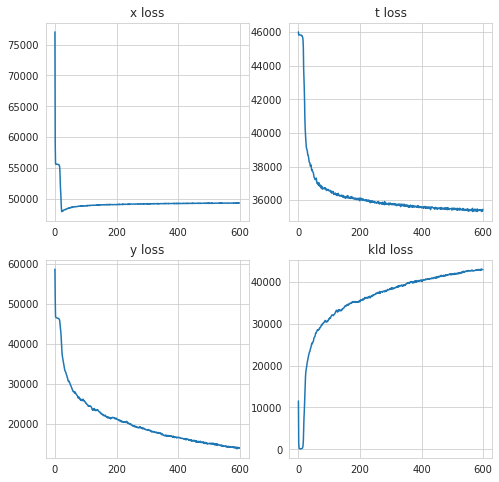

In [95]:
model, losses = train_model(device, plot_curves, print_logs,
              dataloader, num_epochs, lr_start, lr_end, x_dim, z_dim,
              p_y_zt_nn_layers=3, p_y_zt_nn_width=10, 
              p_t_z_nn_layers=3, p_t_z_nn_width=10,
              p_x_z_nn_layers=3, p_x_z_nn_width=10,
              q_z_nn_layers=3, q_z_nn_width=10,
              t_mode=0, y_mode=0, x_mode=[0,0], ty_separate_enc=False, x_loss_scaling=0.5)

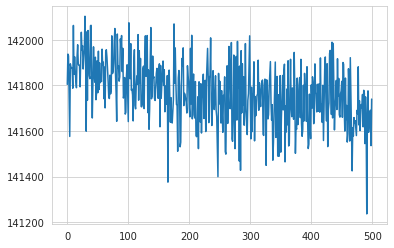

In [100]:
plt.plot(losses['total'][100:])

In [96]:
AID, py_dot_model, py_dot_true, y_range, t_range, pt_true = estimate_AID_lineardata(model, c_yt, c_yz, s_y, c_t, s_t, c_x, n=100, lim=6, nsample=10000)

AID:  0.44197539734422864


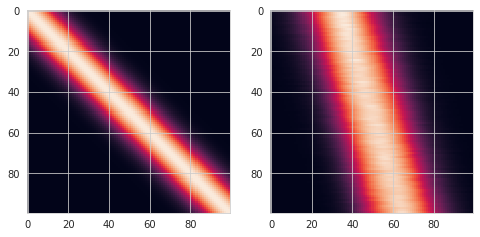

In [97]:
print("AID: ", AID)
fig, ax = plt.subplots(1,2,figsize=(8,4))
ax[0].imshow(py_dot_true)
ax[1].imshow(py_dot_model)
plt.show()

# With strong scaling but "perfect" conditionals
- Note: I guess we have to have stds estimated individually to get this to work
- Note also: apparently estimating stds individually can break the thing, but somehow with neural networks it starts working again...

In [62]:
device='cpu'
plot_curves=False
print_logs=True
num_epochs=100
lr_start=0.001
lr_end=0.0001
x_dim=2
z_dim=1

Epoch 0:
Epoch loss: 78285933.71972656
x: 77501777.19726562, t: 72616.91259765625, y: 686683.5651855469, kld: 24857.42529296875
Epoch 1:
Epoch loss: 19845422.212890625
x: 19359755.73779297, t: 66454.64892578125, y: 396529.3605957031, kld: 22682.22152709961
Epoch 2:
Epoch loss: 3535763.2421875
x: 3176142.2561035156, t: 62983.48602294922, y: 274444.5407714844, kld: 22193.021270751953
Epoch 3:
Epoch loss: 15849483.6328125
x: 15543322.686523438, t: 60655.504943847656, y: 223841.4139404297, kld: 21663.797943115234
Epoch 4:
Epoch loss: 5576231.5
x: 5324284.2001953125, t: 58680.10272216797, y: 172216.02697753906, kld: 21051.43182373047
Epoch 5:
Epoch loss: 3471603.6708984375
x: 3244323.590576172, t: 57023.912353515625, y: 149335.42932128906, kld: 20920.671417236328
Epoch 6:
Epoch loss: 5029725.833984375
x: 4820119.959228516, t: 55499.81726074219, y: 133341.83618164062, kld: 20764.21566772461
Epoch 7:
Epoch loss: 2172938.83203125
x: 1979317.1999511719, t: 54275.889221191406, y: 118722.06262207

Epoch loss: 303915.8195800781
x: 191907.60607910156, t: 44795.12664794922, y: 50740.83776855469, kld: 16472.24771118164
Epoch 64:
Epoch loss: 364345.50732421875
x: 252559.7836303711, t: 44783.17614746094, y: 50549.309020996094, kld: 16453.23927307129
Epoch 65:
Epoch loss: 332111.21728515625
x: 220573.57934570312, t: 44781.522705078125, y: 50322.02087402344, kld: 16434.091995239258
Epoch 66:
Epoch loss: 346469.82373046875
x: 234738.63470458984, t: 44879.79766845703, y: 50436.043518066406, kld: 16415.34568786621
Epoch 67:
Epoch loss: 656729.4819335938
x: 545312.0241699219, t: 44829.56652832031, y: 50192.530334472656, kld: 16395.362350463867
Epoch 68:
Epoch loss: 375155.27734375
x: 263860.7991333008, t: 44852.694396972656, y: 50085.224548339844, kld: 16356.564666748047
Epoch 69:
Epoch loss: 263440.2041015625
x: 152145.29010009766, t: 44912.96844482422, y: 50044.605529785156, kld: 16337.340042114258
Epoch 70:
Epoch loss: 636884.7624511719
x: 525877.5811767578, t: 44802.501403808594, y: 498

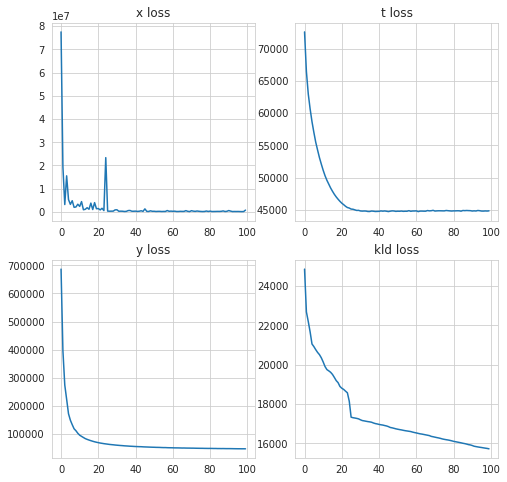

In [71]:
model, losses = train_model(device, plot_curves, print_logs,
              dataloader, num_epochs, lr_start, lr_end, x_dim, z_dim,
              p_y_zt_nn_layers=0, p_y_zt_nn_width=10, 
              p_t_z_nn_layers=0, p_t_z_nn_width=10,
              p_x_z_nn_layers=0, p_x_z_nn_width=10,
              q_z_nn_layers=0, q_z_nn_width=10,
              t_mode=0, y_mode=0, x_mode=[0,0], ty_separate_enc=False, x_loss_scaling=0.1)

In [72]:
AID, py_dot_model, py_dot_true, y_range, t_range, pt_true = estimate_AID_lineardata(model, c_yt, c_yz, s_y, c_t, s_t, c_x, n=100, lim=6, nsample=10000)

AID:  0.2923469847773341


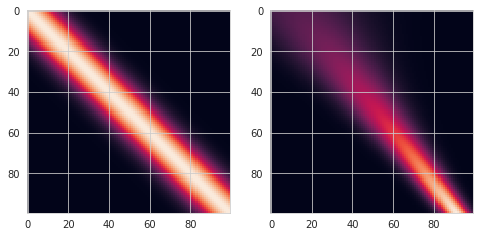

In [73]:
print("AID: ", AID)
fig, ax = plt.subplots(1,2,figsize=(8,4))
ax[0].imshow(py_dot_true)
ax[1].imshow(py_dot_model)
plt.show()

In [79]:
model.decoder.y_nn[0].weight

Parameter containing:
tensor([[-0.3078,  0.7670],
        [ 0.0562, -0.1374]], requires_grad=True)